In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('customer_segmentation/Mall_Customers.csv')

print(data.head())

print(data.columns)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
# Dropping the CustomerID column
data = data.drop(['CustomerID'], axis=1)

# Handling missing values (if any)
data = data.dropna()

# Identifying numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combined preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Applying the preprocessing pipeline to the data
data_processed = preprocessor.fit_transform(data)

# Converting the processed data back to a DataFrame
data_processed = pd.DataFrame(data_processed, columns=numerical_features.tolist() + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist())

# Display the first few rows of the processed data
print(data_processed.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0 -1.424569           -1.738999               -0.434801            0.0   
1 -1.281035           -1.738999                1.195704            0.0   
2 -1.352802           -1.700830               -1.715913            1.0   
3 -1.137502           -1.700830                1.040418            1.0   
4 -0.563369           -1.662660               -0.395980            1.0   

   Gender_Male  
0          1.0  
1          1.0  
2          0.0  
3          0.0  
4          0.0  


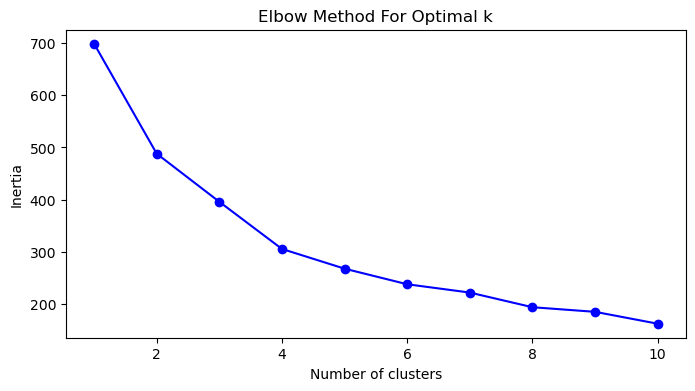

In [4]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Using the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000, n_init=10)
    kmeans.fit(data_processed)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [5]:
from sklearn.cluster import KMeans

# Choose the optimal number of clusters (e.g., k = 3)
optimal_k = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', n_init=10)
kmeans.fit(data_processed)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


C:\Users\PMLS\anaconda3\envs\fyp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


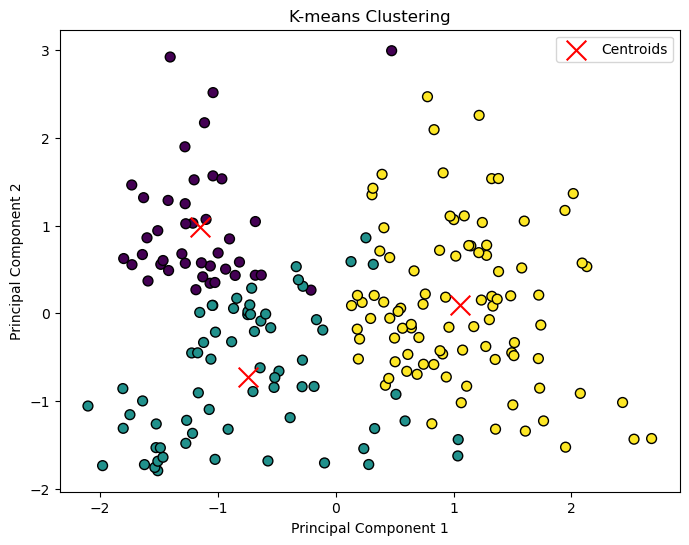

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA on the same data used for clustering
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_processed)  # Transform data for 2D visualization

# Reduce cluster centers to 2D
# Fit PCA again for transformation
cluster_centers_2d = pca.transform(kmeans.cluster_centers_)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

# Assuming `data_processed` is your data and `labels` are the cluster labels
silhouette_avg = silhouette_score(data_processed, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.29


In [11]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Compute the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(data_processed, labels)
print(f'Calinski-Harabasz Index: {ch_score:.2f}')

# Compute the Davies-Bouldin Index
db_score = davies_bouldin_score(data_processed, labels)
print(f'Davies-Bouldin Index: {db_score:.2f}')

Calinski-Harabasz Index: 76.28
Davies-Bouldin Index: 1.27


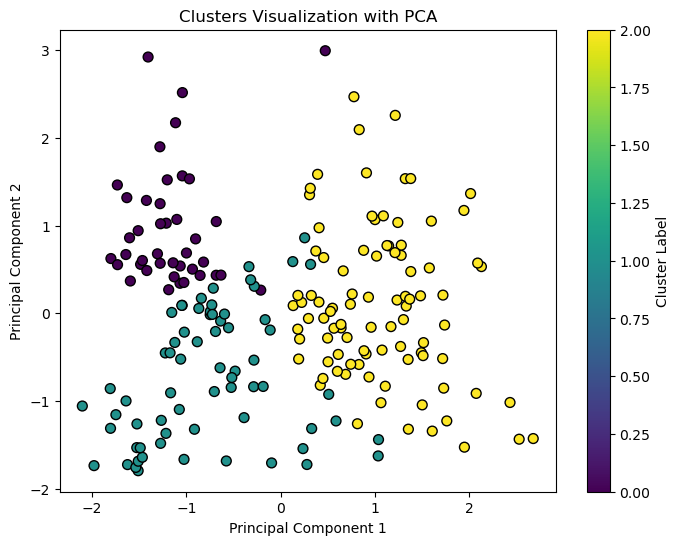

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_processed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


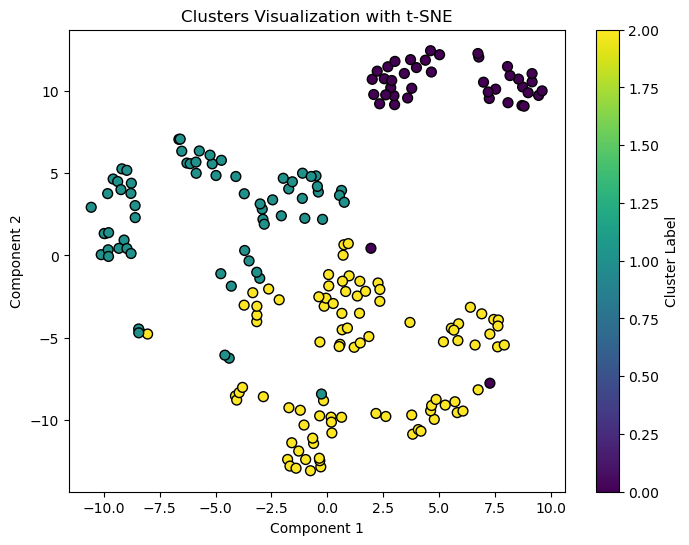

In [13]:
from sklearn.manifold import TSNE

# Reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data_processed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters Visualization with t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()